In [21]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, BatchNormalization, Dropout, RandomFlip, RandomContrast, RandomRotation, RandomCrop
from keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os

In [22]:
train_dir = r"C:\Users\91909\Desktop\LOOP Mentorship\Railway_Fault_Track_Detection_Data\Railway Track fault Detection Updated\Train"
test_dir = r"C:\Users\91909\Desktop\LOOP Mentorship\Railway_Fault_Track_Detection_Data\Railway Track fault Detection Updated\Test"
validation_dir = r"C:\Users\91909\Desktop\LOOP Mentorship\Railway_Fault_Track_Detection_Data\Railway Track fault Detection Updated\Validation"

In [23]:
# categories = ["Defective", "Non defective"]

In [24]:
# train_ds = []
# test_ds = []
# validation_ds = []

# for i in categories:
#         train_path = os.path.join(train_dir, i)
#         test_path = os.path.join(test_dir, i)
#         validation_path = os.path.join(validation_dir, i)
#         if i == "Defective":
#                 label = 1
#         else:
#                 label = 0
        
#         for j in os.listdir(train_path):
#                 img_path1 = os.path.join(train_path, j)
#                 img1 = cv2.imread(img_path1)
#                 img1 = cv2.resize(img1, (300, 300))
#                 train_ds.append([img1, label])
        
#         for k in os.listdir(test_path):
#                 img_path2 = os.path.join(test_path, k)
#                 img2 = cv2.imread(img_path2)
#                 img2 = cv2.resize(img2, (300, 300))
#                 train_ds.append([img2, label])
        
#         for l in os.listdir(validation_path):
#                 img_path3 = os.path.join(validation_path, l)
#                 img3 = cv2.imread(img_path3)
#                 img3 = cv2.resize(img3, (300, 300))
#                 train_ds.append([img3, label])

In [25]:
# random.shuffle(train_ds)
# random.shuffle(test_ds)
# random.shuffle(validation_ds)

In [26]:
# train_ds = np.array(train_ds)
# test_ds = np.array(test_ds)
# validation_ds = np.array(validation_ds)

In [27]:
# image_size = (300, 300)
# batch_size = 32

In [28]:
# train_ds = keras.preprocessing.image_dataset_from_directory(train_dir, image_size=image_size, batch_size=batch_size, labels="inferred")
# test_ds = keras.preprocessing.image_dataset_from_directory(test_dir, image_size=image_size, batch_size=batch_size, labels="inferred")
# validation_ds = keras.preprocessing.image_dataset_from_directory(validation_dir, image_size=image_size, batch_size=batch_size, labels="inferred")

In [29]:
# def normalize(image, label):
#         image = tf.cast(image/255.0, tf.float32)
#         return image, label

# train_ds = train_ds.map(normalize)
# test_ds = test_ds.map(normalize)
# validation_ds = validation_ds.map(normalize)

In [30]:
# for images, labels in train_ds.take(1):        
#         train_image = images[0]
#         train_label = labels[0]

#         train_image = train_image.numpy()
#         plt.title(train_label.numpy())
#         plt.imshow(train_image)

In [31]:
augmentor_train = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=90,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest")

augmentor_test = ImageDataGenerator(
        rescale=1.0/255)

In [32]:
train_aug = augmentor_train.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=32,
        shuffle=True,
        class_mode="binary")

test_aug = augmentor_test.flow_from_directory(
        test_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode="binary")

validation_aug = augmentor_test.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=32,
        class_mode="binary")

Found 299 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


Found 62 images belonging to 2 classes.


In [87]:
model = Sequential()

# model.add(RandomFlip(mode="horizontal"))
# model.add(RandomFlip(mode="vertical"))
# model.add(RandomContrast(factor=0.2))
# model.add(RandomRotation(factor=0.25))
# model.add(RandomCrop(height=500, width=500))

model.add(BatchNormalization(renorm=True))

model.add(BatchNormalization(renorm=True))
model.add(Conv2D(16, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D())

model.add(BatchNormalization(renorm=True))
model.add(Conv2D(32, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D())

model.add(BatchNormalization(renorm=True))
model.add(Conv2D(64, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D())

model.add(BatchNormalization(renorm=True))
model.add(Conv2D(128, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D())

model.add(BatchNormalization(renorm=True))
model.add(Conv2D(256, kernel_size=(3, 3),
                 padding="valid",
                 activation="relu"))
model.add(MaxPooling2D())


model.add(BatchNormalization(renorm=True))
model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(8, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="sigmoid"))

# model.add(MaxPooling2D(pool_size=(2, 2),
#                        strides=2,
#                        padding="valid"))

In [88]:
train_aug.image_shape

(200, 200, 3)

In [89]:
input_shape = (None, 200, 200, 3)

In [90]:
model.build(input_shape=input_shape)

In [91]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_61 (Bat  (None, 200, 200, 3)      21        
 chNormalization)                                                
                                                                 
 batch_normalization_62 (Bat  (None, 200, 200, 3)      21        
 chNormalization)                                                
                                                                 
 conv2d_45 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_63 (Bat  (None, 99, 99, 16)       112       
 chNormalization)                                     

In [92]:
early_stopping = EarlyStopping(
        monitor='val_loss',
        min_delta=0.005,
        patience=5,
        restore_best_weights=True
)

In [93]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [94]:
history = model.fit(train_aug,
                    epochs=20,
                    validation_data=validation_aug,
                    callbacks=[early_stopping])

Epoch 1/20
10/10 [==============================] - 53s 5s/step - loss: 0.7147 - accuracy: 0.4916 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 43s 4s/step - loss: 0.6966 - accuracy: 0.5151 - val_loss: 0.6931 - val_accuracy: 0.4839
Epoch 3/20
10/10 [==============================] - 42s 4s/step - loss: 0.7144 - accuracy: 0.4682 - val_loss: 0.6966 - val_accuracy: 0.4355
Epoch 4/20
10/10 [==============================] - 44s 4s/step - loss: 0.6979 - accuracy: 0.5251 - val_loss: 0.7006 - val_accuracy: 0.5161
Epoch 5/20
10/10 [==============================] - 45s 5s/step - loss: 0.6836 - accuracy: 0.4950 - val_loss: 0.6384 - val_accuracy: 0.6774
Epoch 6/20
10/10 [==============================] - 47s 5s/step - loss: 0.9508 - accuracy: 0.5084 - val_loss: 0.6787 - val_accuracy: 0.5645
Epoch 7/20
10/10 [==============================] - 47s 5s/step - loss: 0.7286 - accuracy: 0.5686 - val_loss: 0.6170 - val_accuracy: 0.6613
Epoch 8/20
10/10 [==

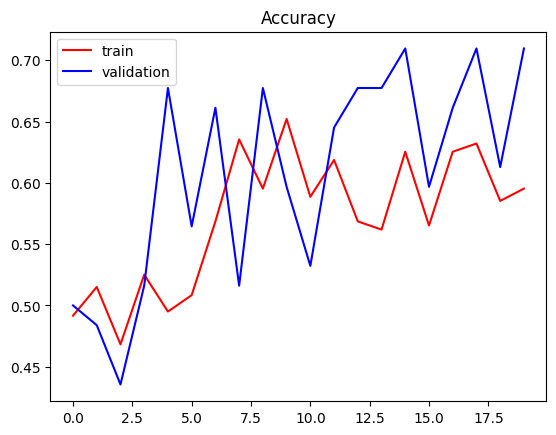

In [95]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color="red", label="train")
plt.plot(history.history["val_accuracy"], color="blue", label="validation")
plt.title("Accuracy")
plt.legend()
plt.show()

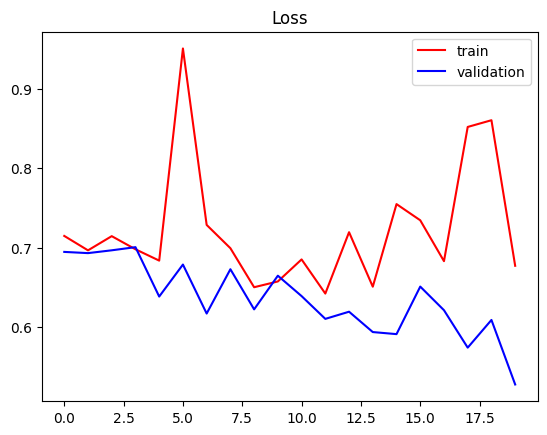

In [96]:
plt.plot(history.history["loss"], color="red", label="train")
plt.plot(history.history["val_loss"], color="blue", label="validation")
plt.title("Loss")
plt.legend()
plt.show()

In [99]:
prediction = model.predict(test_aug, steps=len(test_aug))

1/1 [==============================] - 3s 3s/step


In [103]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [104]:
Y_pred = model.predict(test_aug, steps=len(test_aug))
y_true = test_aug.classes

1/1 [==============================] - 3s 3s/step


In [105]:
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix')
print(cm)

print('Classification Report')
target_names = list(test_aug.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

Confusion Matrix
[[7 4]
 [6 5]]
Classification Report
               precision    recall  f1-score   support

    Defective       0.54      0.64      0.58        11
Non defective       0.56      0.45      0.50        11

     accuracy                           0.55        22
    macro avg       0.55      0.55      0.54        22
 weighted avg       0.55      0.55      0.54        22

